# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(weather_api_key)

c2660a949a55c5f658d0a8423b790e91


### Generate the Cities List by Using the `citipy` Library

In [53]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL

weather_api_key = "c2660a949a55c5f658d0a8423b790e91"
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | mbanza kongo
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | puerto gaitan
Processing Record 8 of Set 1 | mogadishu
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | happy valley-goose bay
Processing Record 14 of Set 1 | bikenibeu village
Processing Record 15 of Set 1 | acarau
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | quang ngai
Processing Record 18 of Set 1 | carauari
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing 

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,35.83,98,100,39.46,TF,1687842677
1,mbanza kongo,-6.2670,14.2401,63.23,95,54,3.20,AO,1687842094
2,adamstown,-25.0660,-130.1015,70.95,80,68,24.11,PN,1687842677
3,punta arenas,-53.1500,-70.9167,33.91,80,75,16.11,CL,1687842564
4,hamilton,39.1834,-84.5333,68.09,90,100,11.50,US,1687842670


In [57]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/yipan/Documents/UCB-VIRT-DATA-PT-01-2023-U-LOLC-main/02-Homework/06-Python-APIs/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [58]:
# Read saved data
city_data_df = pd.read_csv("/Users/yipan/Documents/UCB-VIRT-DATA-PT-01-2023-U-LOLC-main/02-Homework/06-Python-APIs/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,35.83,98,100,39.46,TF,1687842677
1,mbanza kongo,-6.2670,14.2401,63.23,95,54,3.20,AO,1687842094
2,adamstown,-25.0660,-130.1015,70.95,80,68,24.11,PN,1687842677
3,punta arenas,-53.1500,-70.9167,33.91,80,75,16.11,CL,1687842564
4,hamilton,39.1834,-84.5333,68.09,90,100,11.50,US,1687842670


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

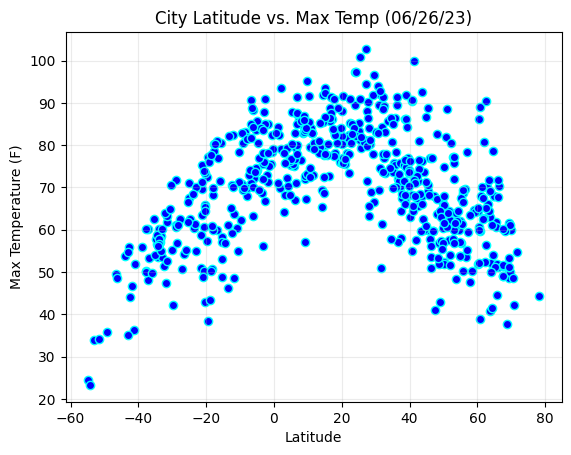

In [59]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="blue", edgecolor="aqua")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temp (06/26/23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("/Users/yipan/Documents/UCB-VIRT-DATA-PT-01-2023-U-LOLC-main/02-Homework/06-Python-APIs/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

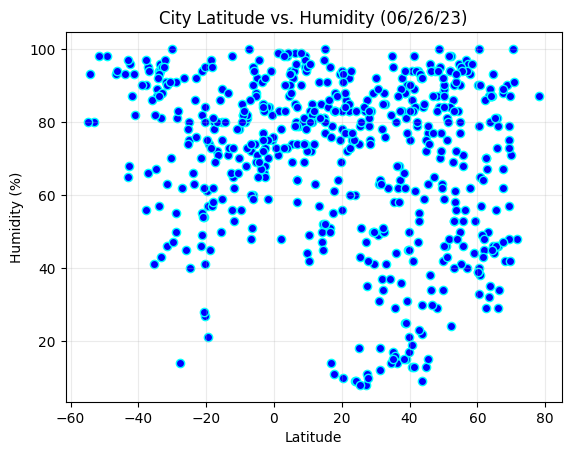

In [60]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="blue", edgecolor="aqua")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (06/26/23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("/Users/yipan/Documents/UCB-VIRT-DATA-PT-01-2023-U-LOLC-main/02-Homework/06-Python-APIs/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

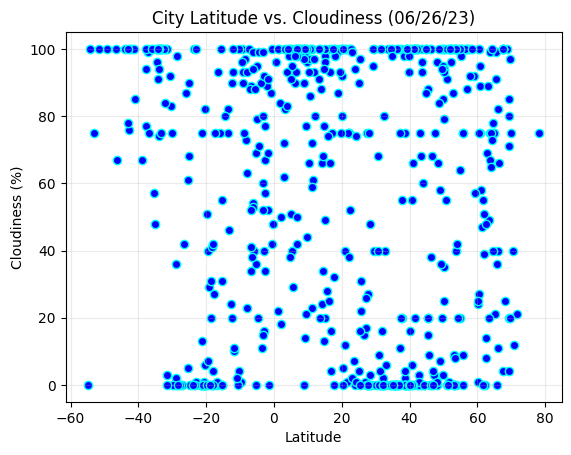

In [61]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="blue", edgecolor="aqua")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (06/26/23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("/Users/yipan/Documents/UCB-VIRT-DATA-PT-01-2023-U-LOLC-main/02-Homework/06-Python-APIs/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

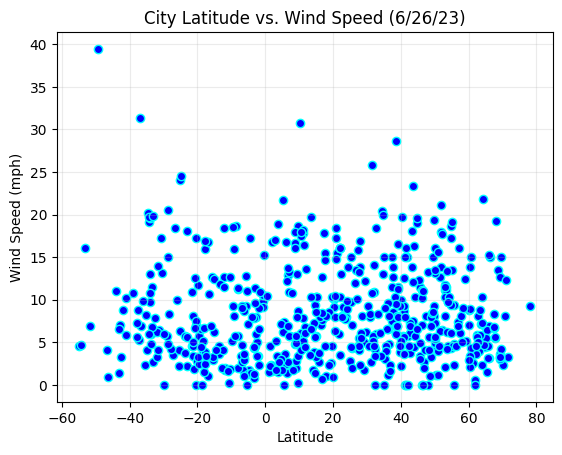

In [63]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="blue", edgecolor="aqua")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (6/26/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.25)


# Save the figure
plt.savefig("/Users/yipan/Documents/UCB-VIRT-DATA-PT-01-2023-U-LOLC-main/02-Homework/06-Python-APIs/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,hamilton,39.1834,-84.5333,68.09,90,100,11.50,US,1687842670
5,iqaluit,63.7506,-68.5145,40.73,80,75,4.61,CA,1687842678
6,puerto gaitan,4.3133,-72.0816,76.30,87,98,3.29,CO,1687842678
7,mogadishu,2.0371,45.3438,79.03,78,18,16.80,SO,1687842678
9,ribeira grande,38.5167,-28.7000,66.78,88,2,5.99,PT,1687842679


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,35.83,98,100,39.46,TF,1687842677
1,mbanza kongo,-6.2670,14.2401,63.23,95,54,3.20,AO,1687842094
2,adamstown,-25.0660,-130.1015,70.95,80,68,24.11,PN,1687842677
3,punta arenas,-53.1500,-70.9167,33.91,80,75,16.11,CL,1687842564
8,puerto ayora,-0.7393,-90.3518,75.54,94,87,9.84,EC,1687842678


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.40682395795042325
Cities in the northern hemisphere moving farther from the equator, temperatures drop.
This shows a strong negative correlation between latitude and tempuratures in the northern hemisphere.


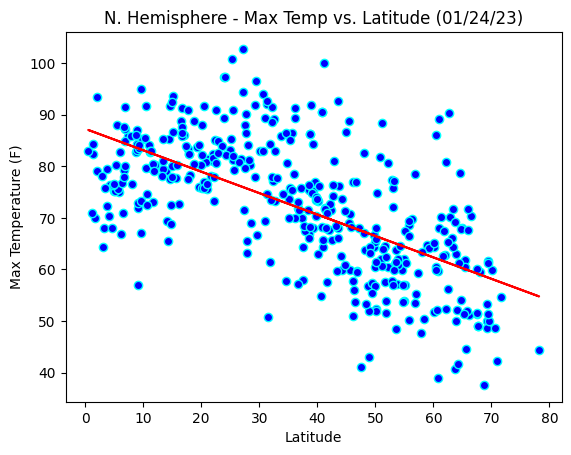

In [67]:
# Linear regression on Northern Hemisphere
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Max Temp vs. Latitude (01/24/23)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("Cities in the northern hemisphere moving farther from the equator, temperatures drop.")
print("This shows a strong negative correlation between latitude and tempuratures in the northern hemisphere.")
plt.savefig("Northern Hemisphere: Temperature vs. Latitude.png")

The r-value is: 0.5685057725635946
Cities in the southern hemisphere moving closer to the equator, temperatures rise.
This shows a slight positive correlation between latitude and temperature in the southern hemisphere.


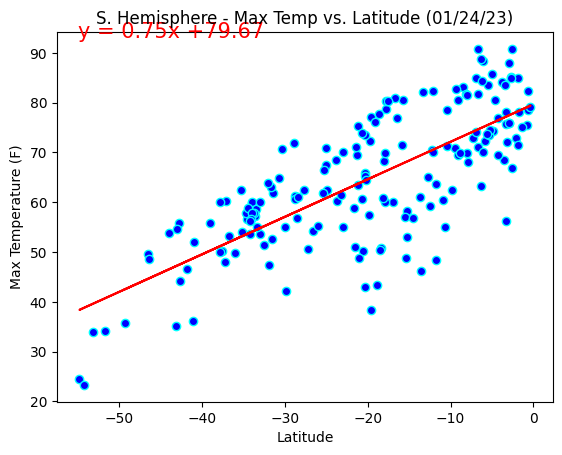

In [68]:
# Linear regression on Southern Hemisphere
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Max Temp vs. Latitude (01/24/23)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-55,93),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("Cities in the southern hemisphere moving closer to the equator, temperatures rise.")
print("This shows a slight positive correlation between latitude and temperature in the southern hemisphere.")
plt.savefig("Southern Hemisphere: Temperature vs. Latitude.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02335422206352562
There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere.


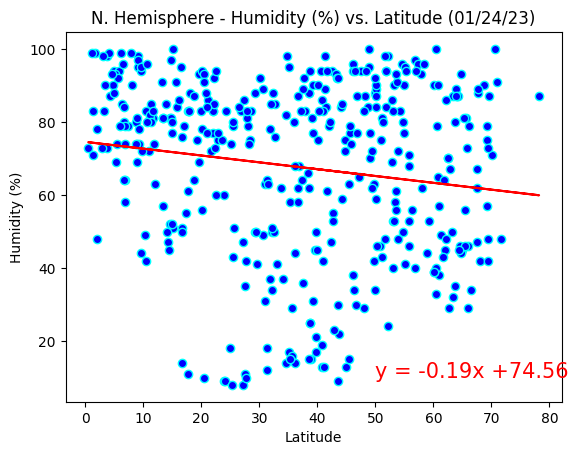

In [69]:
# Northern Hemisphere
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Humidity (%) vs. Latitude (01/24/23)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere.")

plt.savefig("Northern Hemisphere: Humidity vs. Latitude.png")

The r-value is: 0.02170056804720704
There is a slight correlation between humidity and latitude for cities in the southern hemisphere.


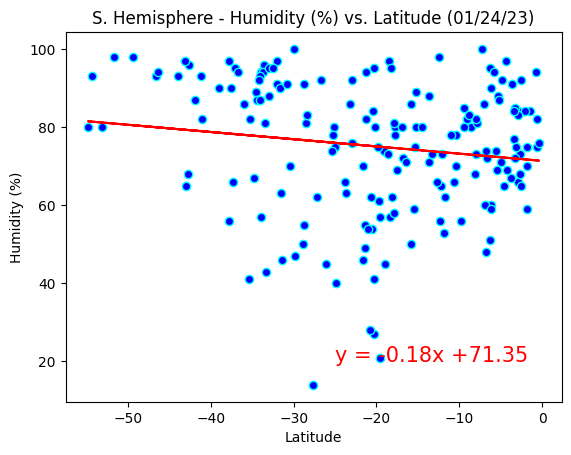

In [70]:
# Southern Hemisphere
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Humidity (%) vs. Latitude (01/24/23)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slight correlation between humidity and latitude for cities in the southern hemisphere.")
plt.savefig("Southern Hemisphere: Humidity vs. Latitude.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.012171274651272155
There is a positive correlation between cloudiness and latitude for cities in the northern hemisphere.


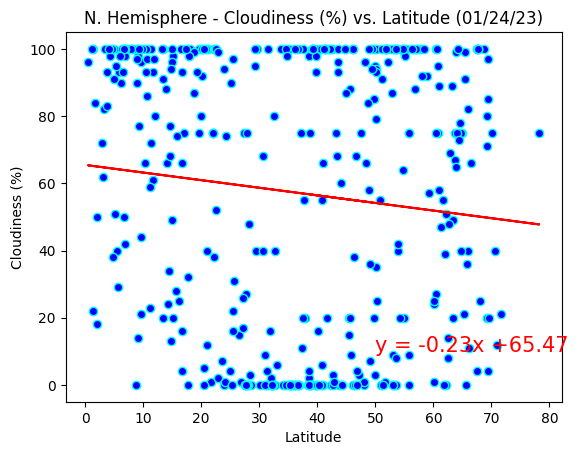

In [71]:
# Northern Hemisphere
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Cloudiness (%) vs. Latitude (01/24/23)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a positive correlation between cloudiness and latitude for cities in the northern hemisphere.")

plt.savefig("Northern Hemisphere: Cloudiness vs. Latitude.png")

The r-value is: 0.03608393352793362
There is a correlation between cloudiness and latitude for cities in the southern hemisphere.


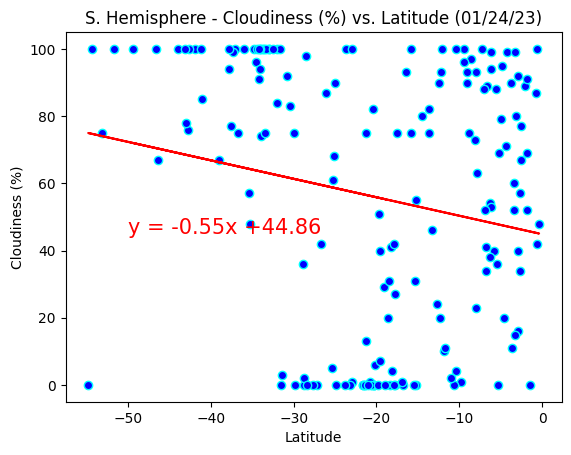

In [72]:
# Southern Hemisphere
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Cloudiness (%) vs. Latitude (01/24/23)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a correlation between cloudiness and latitude for cities in the southern hemisphere.")

plt.savefig("Southern Hemisphere: Cloudiness vs. Latitudet.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002301144124538065
There is a little correlation between wind speed and latitude for cities in the northern hemisphere.


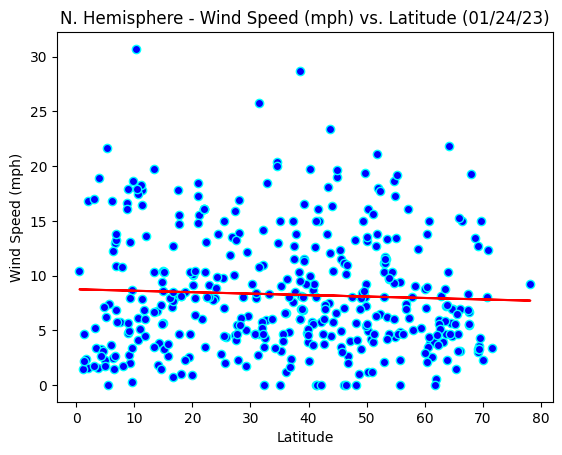

In [73]:
# Northern Hemisphere
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Wind Speed (mph) vs. Latitude (01/24/23)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a little correlation between wind speed and latitude for cities in the northern hemisphere.")

plt.savefig("Northern Hemisphere: Wind Speed vs. Latitude.png")

The r-value is: 0.03841303600039826
There is a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.


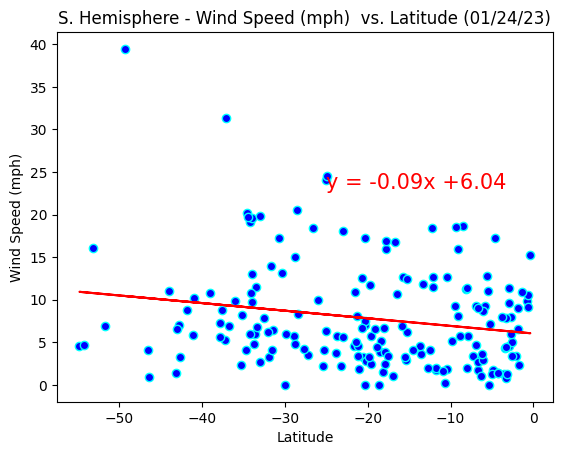

In [74]:
# Southern Hemisphere
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Wind Speed (mph)  vs. Latitude (01/24/23)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-25,23),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.")

plt.savefig("Southern Hemisphere: Wind Speed vs. Latitude.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE